In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from prophet import Prophet

c:\Users\tbutler\AppData\Local\miniforge-pypy3\envs\capstone\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
all_data = pd.read_csv(r"prelim_dataset.csv", index_col=0)
all_data.index = pd.to_datetime(all_data.index)

In [3]:
display(all_data.columns)

Index(['Energy Demand (MWH)', 'HourlyDewPointTemperature',
       'HourlyDryBulbTemperature', 'HourlyPrecipitation',
       'HourlyRelativeHumidity', 'HourlyStationPressure',
       'HourlyWetBulbTemperature', 'HourlyWindSpeed',
       'Energy Price (cents/KWH)', 'CPI-U', 'Unemployment Rate',
       'Unemployment Level', 'Employment Level', 'Labor Force Level',
       'Employment Population Ratio', 'Labor Force Participation',
       'Civilian Noninstitutional Population', 'Payroll Employment'],
      dtype='object')

In [39]:
display(all_data.head(4))
display(all_data.tail(4))

,Energy Demand (MWH),HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlyStationPressure,HourlyWetBulbTemperature,HourlyWindSpeed,Energy Price (cents/KWH),CPI-U,Unemployment Rate,Unemployment Level,Employment Level,Labor Force Level,Employment Population Ratio,Labor Force Participation,Civilian Noninstitutional Population,Payroll Employment
2018-06-19 05:00:00,7221.0,72.0,78.0,0.0,82.0,29.62,74.0,6.0,19.28,274.17,4.2,180976.0,4091124.0,4272100.0,57.6,60.1,7105823.0,4565.0
2018-06-19 06:00:00,6911.0,70.0,79.0,0.0,74.0,29.63,73.0,6.0,19.28,274.17,4.2,180976.0,4091124.0,4272100.0,57.6,60.1,7105823.0,4565.0
2018-06-19 07:00:00,6691.0,69.0,81.0,0.0,67.0,29.63,73.0,NaN,19.28,274.17,4.2,180976.0,4091124.0,4272100.0,57.6,60.1,7105823.0,4565.0
2018-06-19 08:00:00,6582.0,67.0,82.0,0.0,60.0,29.63,72.0,NaN,19.28,274.17,4.2,180976.0,4091124.0,4272100.0,57.6,60.1,7105823.0,4565.0


,Energy Demand (MWH),HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlyStationPressure,HourlyWetBulbTemperature,HourlyWindSpeed,Energy Price (cents/KWH),CPI-U,Unemployment Rate,Unemployment Level,Employment Level,Labor Force Level,Employment Population Ratio,Labor Force Participation,Civilian Noninstitutional Population,Payroll Employment
2024-01-29 02:00:00,5611.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-29 03:00:00,5467.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-29 04:00:00,5228.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-29 05:00:00,4955.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
time = all_data.index
print("Start of timeseries: {}".format(time.min()))
print("End of timeseries: {}".format(time.max()))

Start of timeseries: 2018-06-19 05:00:00
End of timeseries: 2024-01-29 05:00:00


### Separate holdout test data

In [10]:
# use ~ last six months of data for final evaluation
holdout_test_data = all_data[all_data.index >= np.datetime64("2023-06-01")]
# remove test data from the rest of the dataset
training_data = all_data[~all_data.index.isin(holdout_test_data.index)]

# Want to visualize data and remove outliers

In [7]:
tbats_model = tbats.TBATS(seasonal_periods=[24, 24*365.25])  # Specify both seasonal periods
tbats_fit = tbats_model.fit(training_data["Energy Demand (MWH)"])

In [ ]:
tbats_fit.plot_components()
plt.show()

In [35]:
m = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=True, changepoint_prior_scale=0.01)
# m.add_seasonality(name='Yearly', period=365.25*24, fourier_order=10)
# m.add_seasonality(name='Daily', period=24, fourier_order=10)
df = training_data[["Energy Demand (MWH)"]].reset_index().rename(columns={"index":"ds", "Energy Demand (MWH)":"y"})
# df["y"] = df["y"].diff()
display(df)
results = m.fit(df)
# forecast = .predict(0)
# fig = m.plot_components(forecast)

,ds,y
0,2018-06-19 05:00:00,7221.0
1,2018-06-19 06:00:00,6911.0
2,2018-06-19 07:00:00,6691.0
3,2018-06-19 08:00:00,6582.0
4,2018-06-19 09:00:00,6600.0
...,...,...
43382,2023-05-31 19:00:00,5851.0
43383,2023-05-31 20:00:00,5986.0
43384,2023-05-31 21:00:00,6116.0
43385,2023-05-31 22:00:00,6140.0


14:50:30 - cmdstanpy - INFO - Chain [1] start processing
14:50:42 - cmdstanpy - INFO - Chain [1] done processing


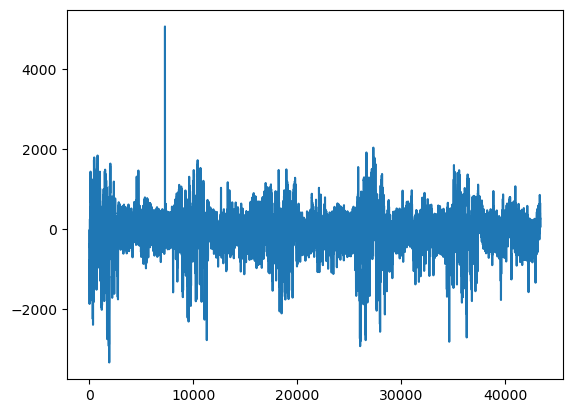

In [38]:
forecasts = m.predict(df)
# display(forecasts)
residuals = forecasts["yhat"] - df["y"]
# display(residuals)
# fig = m.plot_components(forecast)
plt.plot(residuals)

2018-06-19 05:00:00      NaN
2018-06-19 06:00:00   -310.0
2018-06-19 07:00:00   -220.0
2018-06-19 08:00:00   -109.0
2018-06-19 09:00:00     18.0
                       ...  
2023-05-31 19:00:00    125.0
2023-05-31 20:00:00    135.0
2023-05-31 21:00:00    130.0
2023-05-31 22:00:00     24.0
2023-05-31 23:00:00   -238.0
Name: Energy Demand (MWH), Length: 43387, dtype: float64

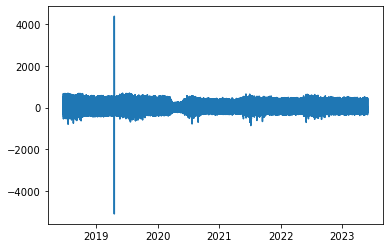

In [16]:
t = training_data["Energy Demand (MWH)"].diff()
display(t)
plt.plot(t)

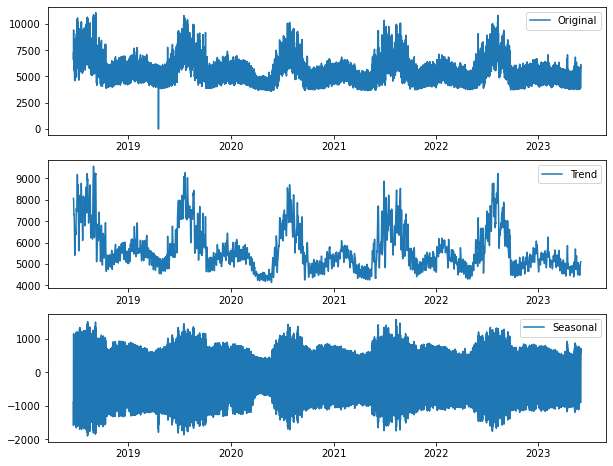

In [23]:
# Apply STL decomposition
y = training_data["Energy Demand (MWH)"]
stl_result = sm.tsa.STL(y).fit()

# Plot the components
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

ax1.plot(y, label='Original')
ax1.legend()

ax2.plot(stl_result.trend, label='Trend')
ax2.legend()

ax3.plot(stl_result.seasonal, label='Seasonal')
ax3.legend()

plt.show()

In [33]:
from scipy.stats import norm

# function to detect outliers using moving average estimation
def detect_outliers(data, n=1000, p=0.99):
    """
    Detect outliers in a time series using a moving average estimation model.

    Parameters:
    - data: Time series data.
    - n: Window size for the moving average (default: 1000).
    - p: Initial threshold probability (default: 0.99).

    Returns:
    - outliers: Boolean array indicating whether each data point is an outlier.
    """

    outliers = np.zeros_like(data, dtype=bool)
    half_n = n // 2

    for i in range(half_n, len(data) - half_n):
        window = data[i - half_n : i + half_n + 1]
        mean = np.mean(window)
        std_dev = np.std(window)

        z_score = (data[i] - mean) / std_dev
        probability = norm.cdf(z_score)

        if probability <= (1 - p):
            outliers[i] = True

    return outliers

your_time_series_data = training_data["Energy Demand (MWH)"]

outliers = detect_outliers(your_time_series_data)

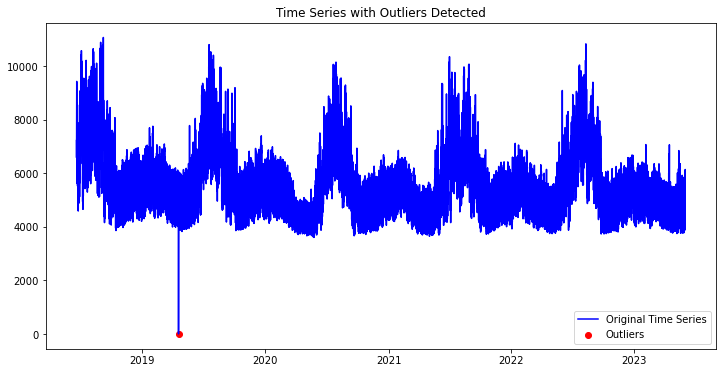

In [34]:
# Plot the time series with outliers marked
plt.figure(figsize=(12, 6))
plt.plot(your_time_series_data, label='Original Time Series', color='blue')
outliers = your_time_series_data[outliers]
plt.scatter(outliers.index, outliers, color='red', label='Outliers')
plt.legend()
plt.title('Time Series with Outliers Detected')
plt.show()

### Visualize Exogenous Hourly Variables

In [ ]:
# want to visualize distribution, and time-series decomposition with outliers highlighted in the residuals plot


### Visualize Exogenous Monthly Variables

In [ ]:
# want to visualize distribution and time-series decomposition with outliers highlighted in the residuals plot

### Remove Outliers

### Impute Missing Values using tbats models

In [7]:
display(training_data.isna().sum())

Energy Demand (MWH)                        0
HourlyDewPointTemperature               1032
HourlyDryBulbTemperature                1023
HourlyPrecipitation                     3434
HourlyRelativeHumidity                  1032
HourlyStationPressure                   1224
HourlyWetBulbTemperature                1249
HourlyWindSpeed                         7960
Energy Price (cents/KWH)                   0
CPI-U                                      0
Unemployment Rate                          0
Unemployment Level                         0
Employment Level                           0
Labor Force Level                          0
Employment Population Ratio                0
Labor Force Participation                  0
Civilian Noninstitutional Population       0
Payroll Employment                         0
dtype: int64

In [8]:
clean_training_data = training_data.fillna(method="bfill")

In [9]:
display(clean_training_data.isna().sum())

Energy Demand (MWH)                     0
HourlyDewPointTemperature               0
HourlyDryBulbTemperature                0
HourlyPrecipitation                     0
HourlyRelativeHumidity                  0
HourlyStationPressure                   0
HourlyWetBulbTemperature                0
HourlyWindSpeed                         0
Energy Price (cents/KWH)                0
CPI-U                                   0
Unemployment Rate                       0
Unemployment Level                      0
Employment Level                        0
Labor Force Level                       0
Employment Population Ratio             0
Labor Force Participation               0
Civilian Noninstitutional Population    0
Payroll Employment                      0
dtype: int64

In [10]:
display(holdout_test_data["Energy Demand (MWH)"].isna().sum())

0

Remove Weakly Correlated Variables and transform highly correlated variables

<AxesSubplot:>

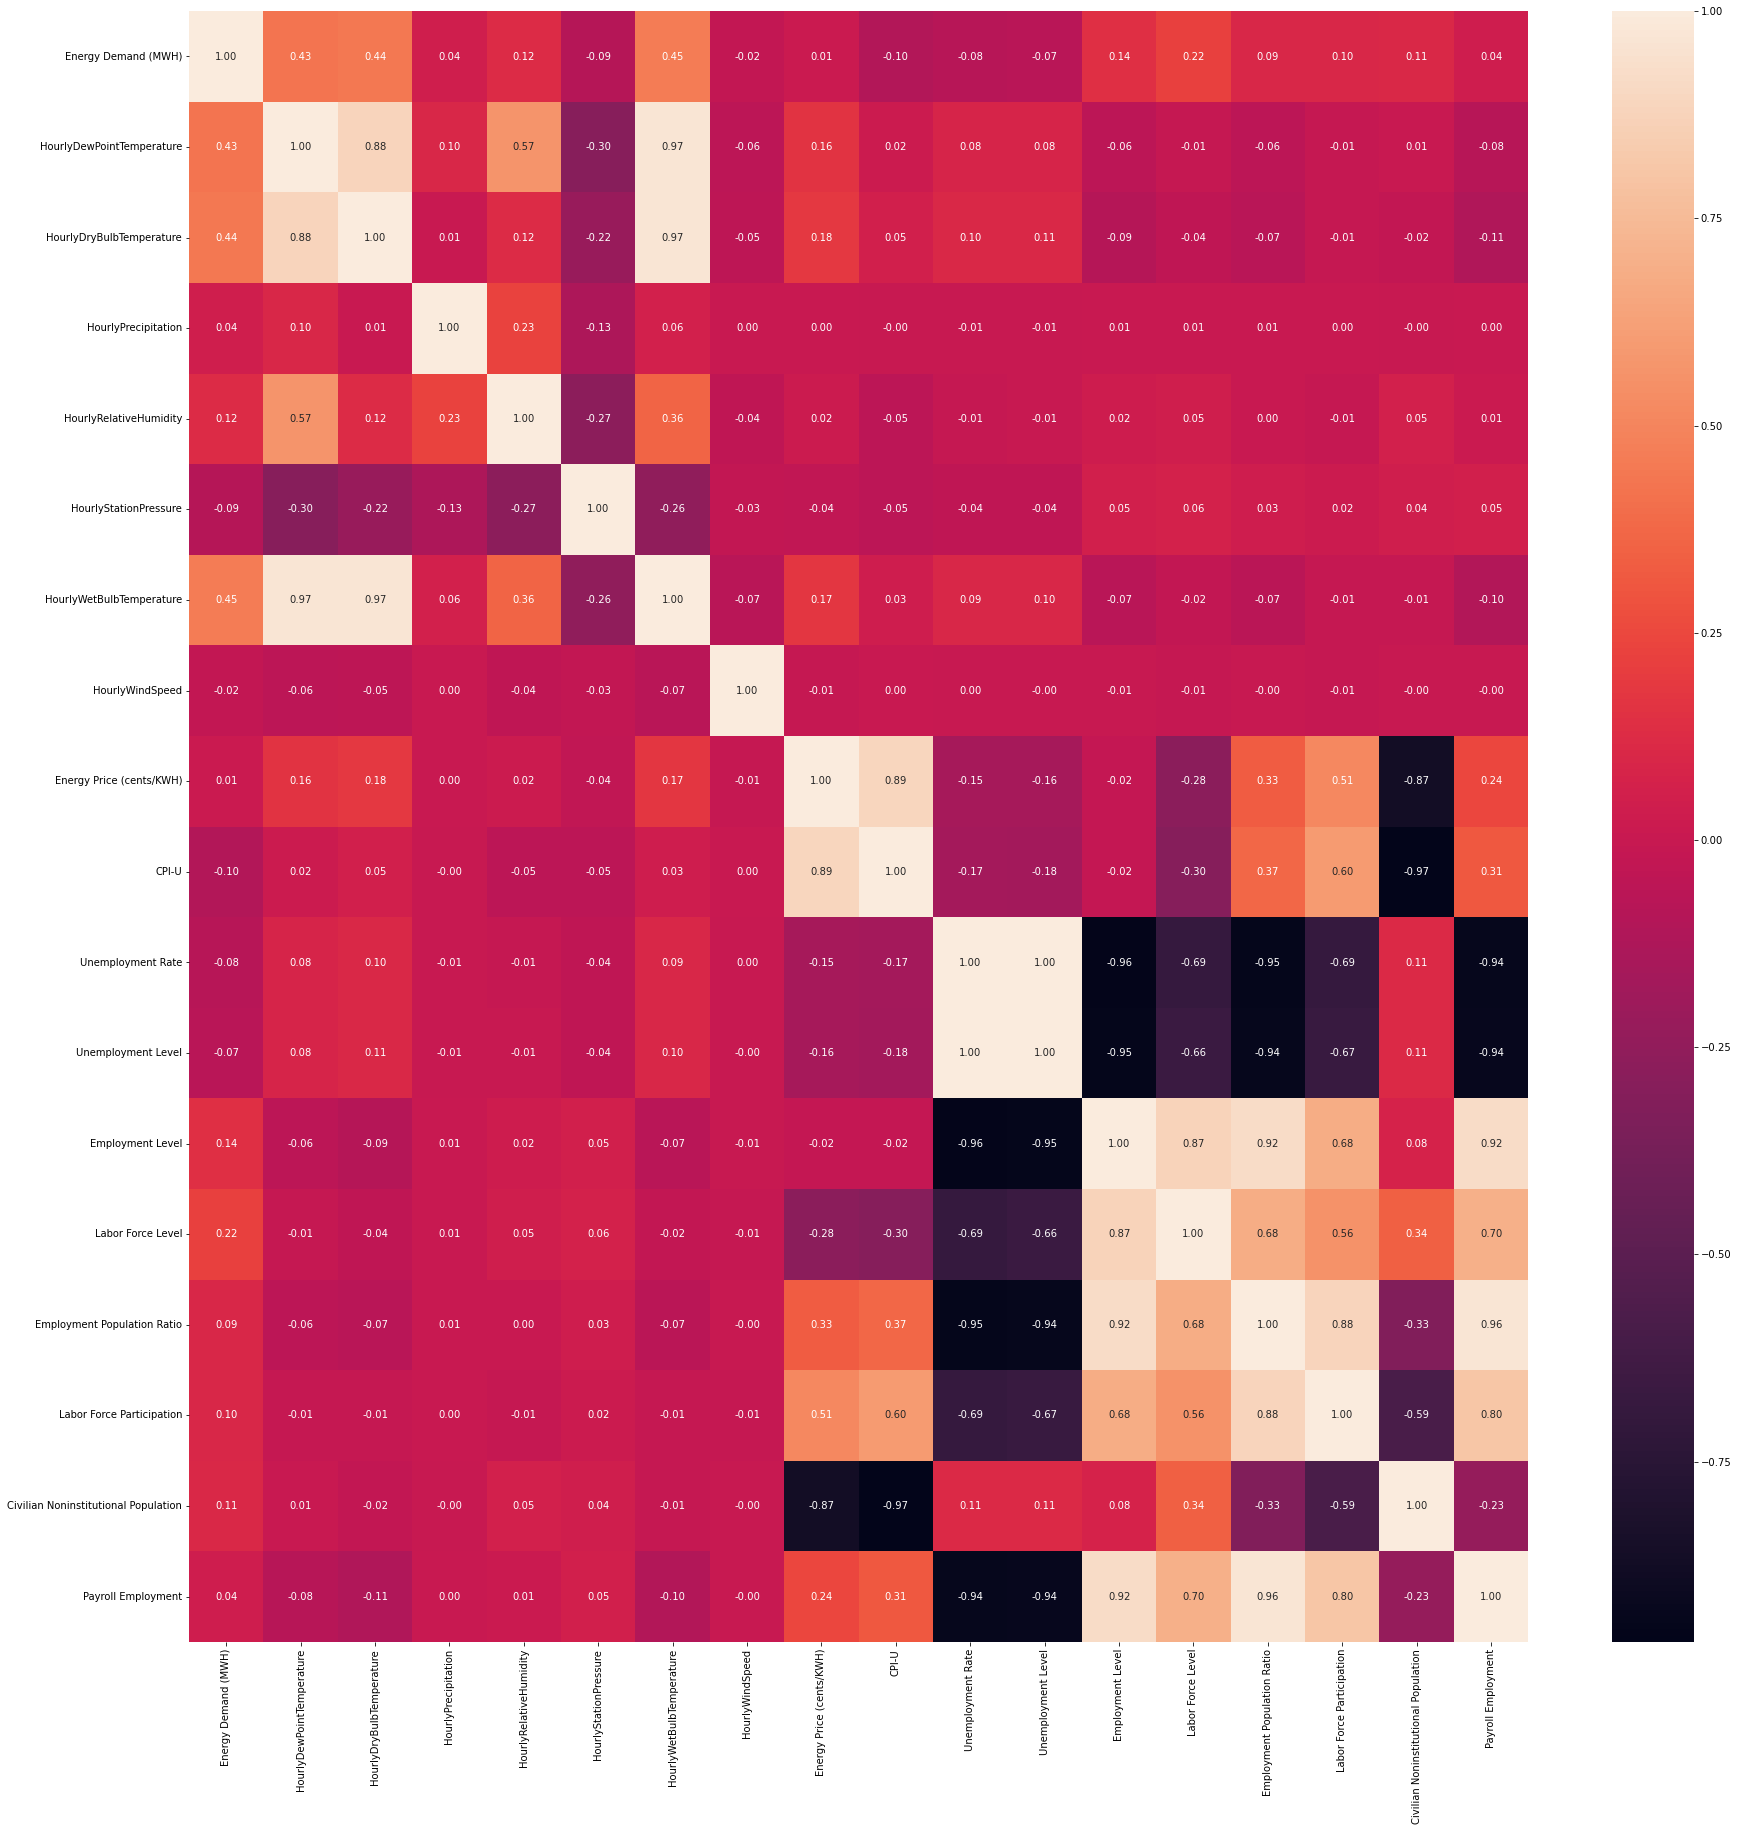

In [26]:
correlations = all_data.corr()
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot()
sns.heatmap(correlations, annot=True, fmt=".2f")

### Want to drop Energy Price,  Hourly Wind Speed, and Payroll Employment

C:\Users\tbutler\AppData\Local\Temp/ipykernel_11628/2256177392.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


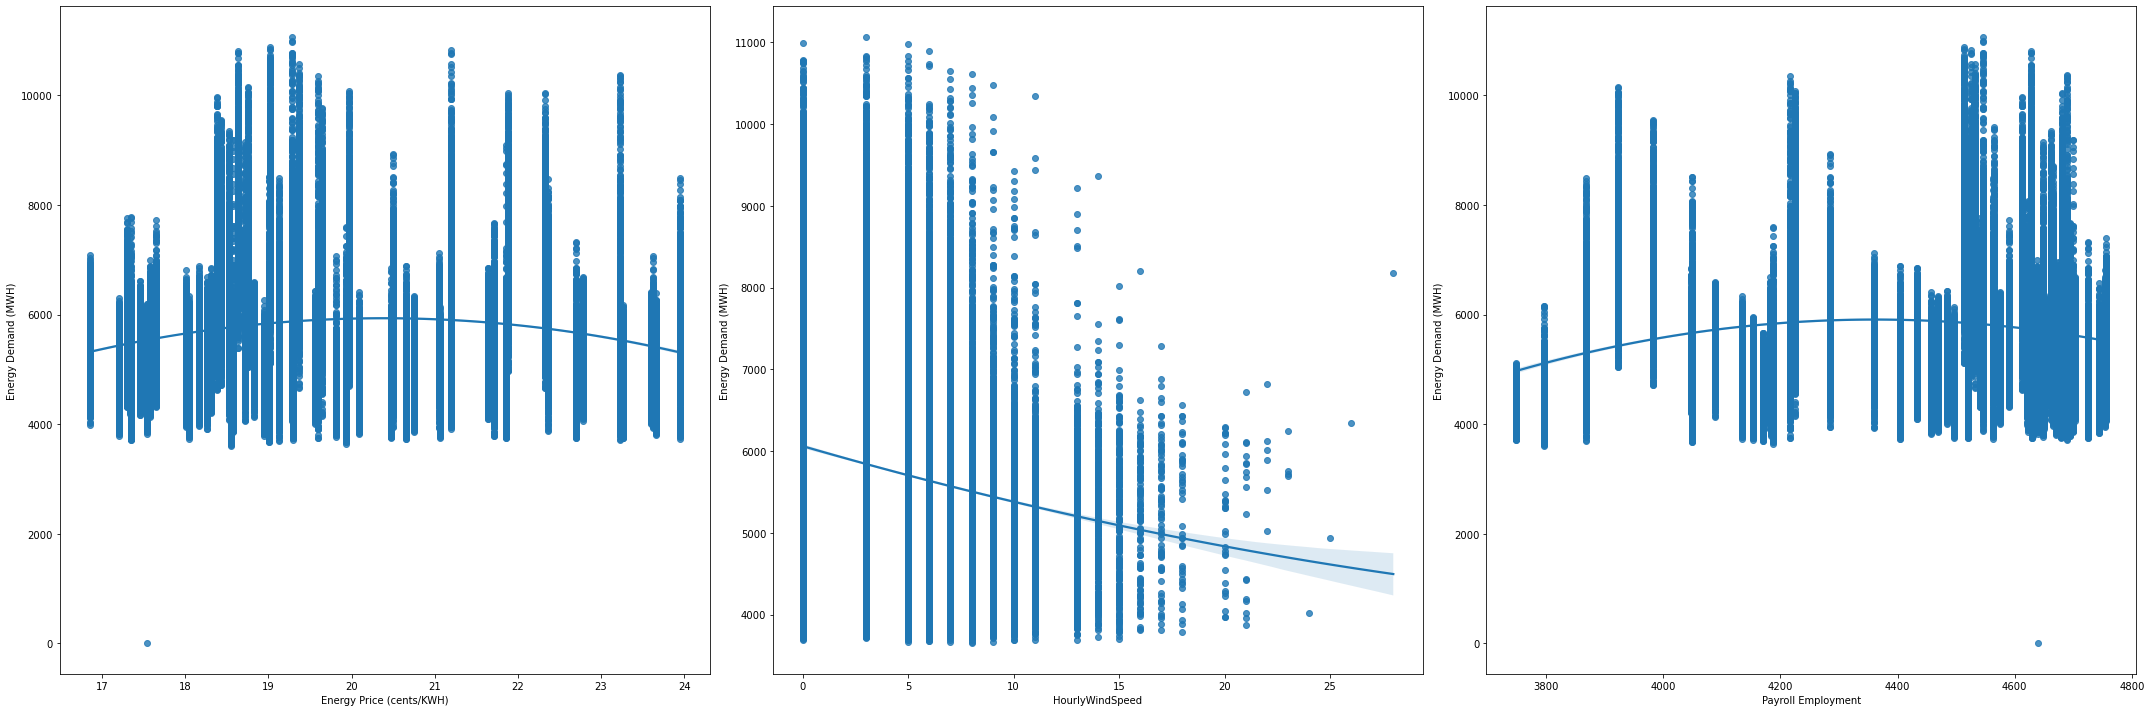

In [25]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(1,3,1)
sns.regplot(data=all_data, x="Energy Price (cents/KWH)", y="Energy Demand (MWH)", order=2)

ax = fig.add_subplot(1,3,2)
temp_df = all_data.copy()
temp_df.loc[temp_df["HourlyWindSpeed"]>1000, "HourlyWindSpeed"] = 0
sns.regplot(data=temp_df, x="HourlyWindSpeed", y="Energy Demand (MWH)", order=2)

ax = fig.add_subplot(1,3,3)
sns.regplot(data=all_data, x="Payroll Employment", y="Energy Demand (MWH)", order=2)

fig.tight_layout()
fig.show()

In [24]:
clean_training_data = training_data.drop(columns={'HourlyDewPointTemperature','HourlyWetBulbTemperature','Unemployment Level', 'Employment Level',  'Payroll Employment'})

# Save Cleaned Training and Test Datasets

In [25]:
columns = clean_training_data.columns.to_series()
columns = columns.str.replace(" |\([^)]*\)", "")
# display(columns)
clean_training_data.columns = columns

C:\Users\tbutler\AppData\Local\Temp/ipykernel_13996/1890021546.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace(" |\([^)]*\)", "")


In [26]:
print(clean_training_data.columns)

Index(['EnergyDemand', 'HourlyDryBulbTemperature', 'HourlyPrecipitation',
       'HourlyRelativeHumidity', 'HourlyStationPressure', 'HourlyWindSpeed',
       'EnergyPrice', 'CPI-U', 'UnemploymentRate', 'LaborForceLevel',
       'EmploymentPopulationRatio', 'LaborForceParticipation',
       'CivilianNoninstitutionalPopulation'],
      dtype='object')


In [27]:
clean_training_data.to_csv(r"clean_training_data.csv")
holdout_test_data[["Energy Demand (MWH)"]].to_csv(r"holdout_test_data.csv")